C:\Users\IT Baron Capital\AppData\Local\Temp\ipykernel_1788\1391702443.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, new_row], ignore_index=True)


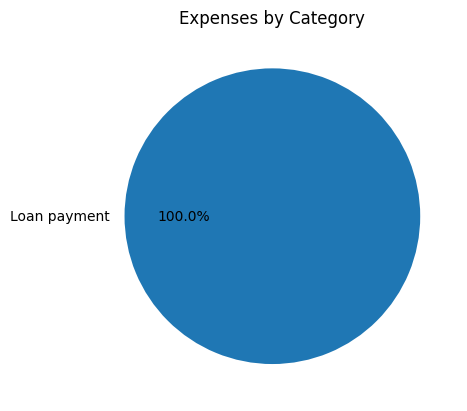

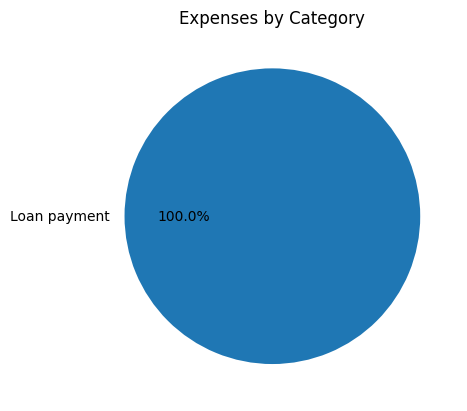

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

# Initialize DataFrame
data = pd.DataFrame(columns=['Date', 'Category', 'Amount'])

# Add transaction function
def add_transaction(date, category, amount):
    global data
    new_row = pd.DataFrame([{'Date': date, 'Category': category, 'Amount': float(amount)}])
    data = pd.concat([data, new_row], ignore_index=True)

# Generate report function
def generate_report():
    if data.empty:
        return messagebox.showinfo("No Data", "No transactions available.")
    total_income = data[data['Amount'] > 0]['Amount'].sum()
    total_expenses = data[data['Amount'] < 0]['Amount'].sum()
    summary = f"Total Income: ${total_income}\nTotal Expenses: ${abs(total_expenses)}\nBalance: ${total_income + total_expenses}"
    messagebox.showinfo("Summary Report", summary)
    data[data['Amount'] < 0].groupby('Category')['Amount'].sum().abs().plot.pie(autopct='%1.1f%%')
    plt.title('Expenses by Category')
    plt.ylabel('')
    plt.show()

# GUI Transaction Handling
def add_transaction_gui():
    try:
        add_transaction(date_entry.get(), category_entry.get(), float(amount_entry.get()))
        messagebox.showinfo("Success", "Transaction added.")
    except ValueError:
        messagebox.showerror("Input Error", "Amount must be a number.")

# Set up GUI
app = tk.Tk()
app.title("Finance Tracker")
for label, entry in [("Date (YYYY-MM-DD):", 'date_entry'), ("Category:", 'category_entry'), ("Amount:", 'amount_entry')]:
    tk.Label(app, text=label).pack()
    globals()[entry] = tk.Entry(app)
    globals()[entry].pack()

tk.Button(app, text="Add Transaction", command=add_transaction_gui).pack()
tk.Button(app, text="Generate Report", command=generate_report).pack()
app.mainloop()